In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras import layers
import cv2

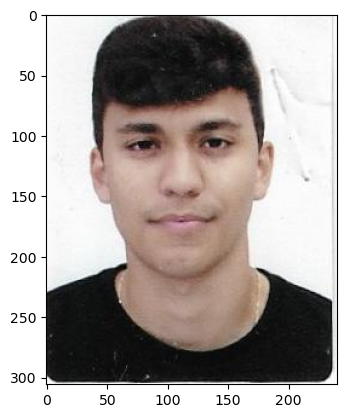

In [2]:
image = cv2.imread('image.jpg')

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image)

In [3]:
# 306 pixels de altura, 241 pixels de largura e possui 3 canais de cores (RGB)

image.shape

(306, 241, 3)

In [4]:
image = image / 255

In [5]:
red_channel = image[:, :, 0]
green_channel = image[:, :, 1]
blue_channel = image[:, :, 2]

In [6]:
def handleFilter(image, kernel):
    excess = image.shape[0] % 3

    for _ in range(0 if excess == 0 else 3 - excess):
        image = np.vstack([image, np.zeros(image.shape[1])])
    
    excess = image.shape[1] % 3

    for _ in range(0 if excess == 0 else 3 - excess):
        image = np.column_stack((image, np.zeros(image.shape[0])))
            
    limit_vertical = image.shape[0]
    limit_horizontal = image.shape[1]
    
    move_vertical = kernel.shape[0]
    move_horizontal = kernel.shape[1]
    
    new_image = []
    
    for y in range(limit_vertical//move_vertical): # line
        row = y * move_vertical
        
        new_line = []
        
        for x in range(limit_horizontal//move_horizontal): # column
            column = x * move_horizontal
                        
            result = tf.reduce_sum(tf.multiply(image[row:row + move_vertical, column:column + move_horizontal], kernel)).numpy()
            
            new_line.append(result)
            
        new_image.append(new_line)
        
    return np.array(new_image)

# gaussian blur
blur_kernel = (1 / 16.0) * np.array([
                                        [1., 2., 1.],
                                        [2., 4., 2.],
                                        [1., 2., 1.]
                                    ])

new_red_channel = handleFilter(red_channel, np.array(blur_kernel))
new_green_channel = handleFilter(green_channel, np.array(blur_kernel))
new_blue_channel = handleFilter(blue_channel, np.array(blur_kernel))

new_image = np.dstack([new_red_channel, new_green_channel, new_blue_channel])

In [7]:
new_image.shape

(102, 81, 3)

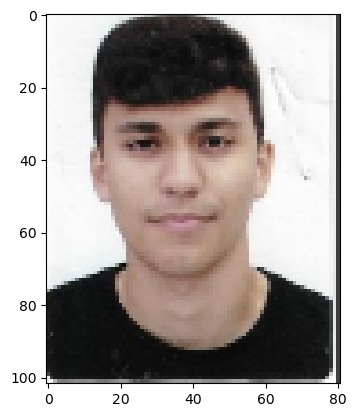

In [8]:
plt.imshow(new_image)